# Sessionization by both IP Address Only

,SessionID,SessionDate,SessionDuration,RequestCount,CompanyCount,UserAgentCount,UniqueMessageCount,OpenCount,ClickCount,UniqueLinkCount
0,1,2019-07-15 12:00:00.093000000,3600,1698870,517,15353,722646,681779,74806,9031
1,2,2019-07-15 12:18:35.227000000,0,1,1,1,1,1,0,1
2,3,2019-07-15 12:31:07.650000000,0,1,1,1,1,1,0,1
3,4,2019-07-15 12:40:51.373000000,0,1,1,1,1,1,0,1
4,5,2019-07-15 12:10:22.767000000,12,2,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...
779069,779070,2019-07-15 12:33:58.753000000,0,1,1,1,1,1,0,1
779070,779071,2019-07-15 12:33:47.857000000,0,1,1,1,1,0,1,1
779071,779072,2019-07-15 12:27:30.770000000,0,1,1,1,1,1,0,1
779072,779073,2019-07-15 12:03:18.723000000,0,1,1,1,1,1,0,1


SessionID              int64
SessionDate           object
SessionDuration        int64
RequestCount           int64
CompanyCount           int64
UserAgentCount         int64
UniqueMessageCount     int64
OpenCount              int64
ClickCount             int64
UniqueLinkCount        int64
dtype: object


<Figure size 432x288 with 0 Axes>

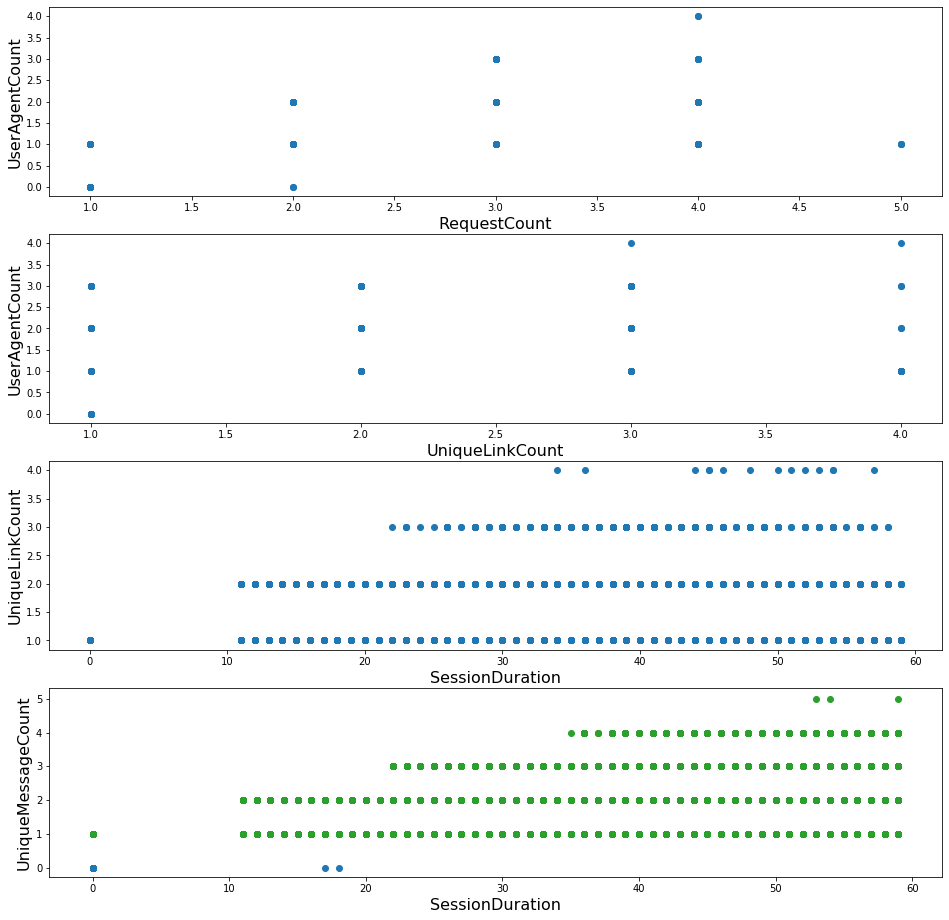

<Figure size 432x288 with 0 Axes>

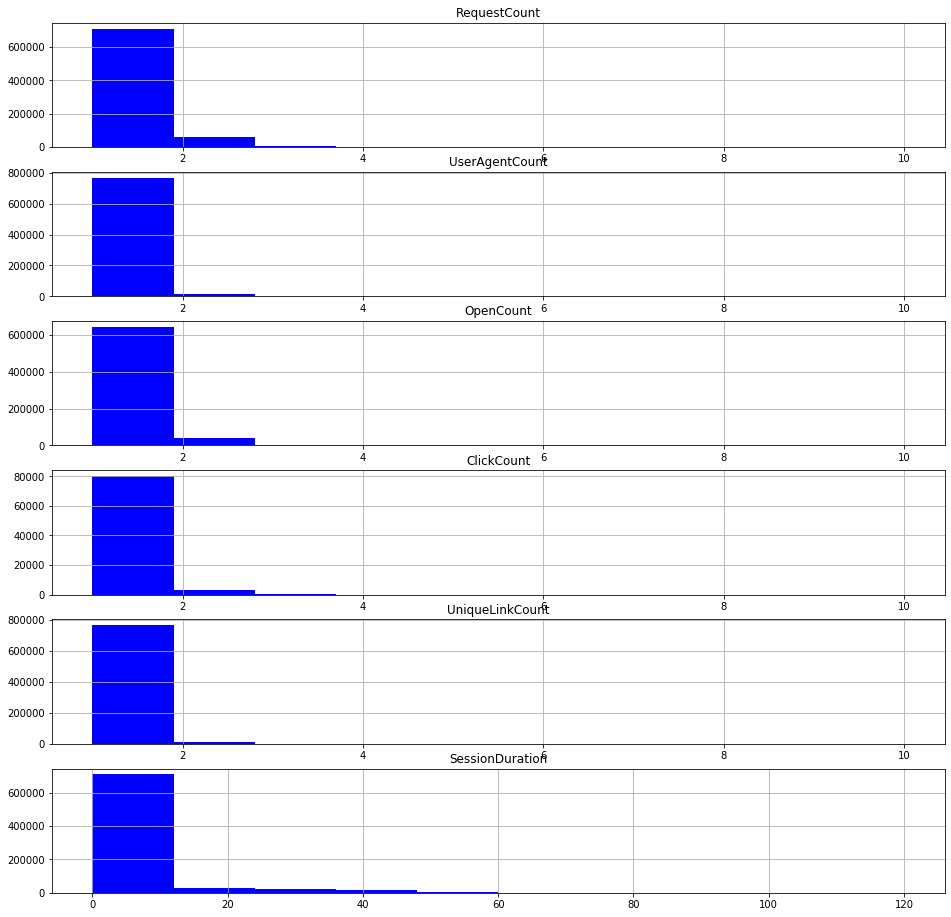

,SessionID,SessionDuration,RequestCount,CompanyCount,UserAgentCount,UniqueMessageCount,OpenCount,ClickCount,UniqueLinkCount
SessionID,1,0.00103382,0.0011186,0.00141644,-0.00158524,0.00139265,0.000454256,1.80825e-05,-0.000454452
SessionDuration,0.00103382,1,0.926541,0.581787,0.375103,0.811421,0.433458,0.101838,0.359274
RequestCount,0.0011186,0.926541,1,0.609937,0.368852,0.876685,0.459701,0.103567,0.366949
CompanyCount,0.00141644,0.581787,0.609937,1,0.170466,0.695958,0.352488,-0.0268313,0.0533845
UserAgentCount,-0.00158524,0.375103,0.368852,0.170466,1,0.127381,0.0883064,0.268988,0.760979
UniqueMessageCount,0.00139265,0.811421,0.876685,0.695958,0.127381,1,0.463638,-0.0487135,0.0442632
OpenCount,0.000454256,0.433458,0.459701,0.352488,0.0883064,0.463638,1,-0.644252,-0.0339441
ClickCount,1.80825e-05,0.101838,0.103567,-0.0268313,0.268988,-0.0487135,-0.644252,1,0.423085
UniqueLinkCount,-0.000454452,0.359274,0.366949,0.0533845,0.760979,0.0442632,-0.0339441,0.423085,1


In [2]:

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.cm as cm
from IPython.display import display

%matplotlib inline

df = pd.read_csv("C:/Users/youci/Documents/EmailTrackingSessions_IPOnly.csv")

# Show dataframe
pd.options.display.max_columns = None
display(df) # show raw data
print(df.dtypes)

# Filter out outliers
df = df[df["RequestCount"] < 500]

# Show a few scatter
def SetScatterSubPlot(ax, X,Y):
    ax.set_xlabel(X, fontsize=16)
    ax.set_ylabel(Y, fontsize=16)
    ax.scatter(df[X], df[Y])

plt.clf()
fig, ax = plt.subplots(nrows=6, ncols=1, figsize = (16,16))    
SetScatterSubPlot(ax[0], "RequestCount", "UserAgentCount")
SetScatterSubPlot(ax[1], "UniqueLinkCount", "UserAgentCount")
SetScatterSubPlot(ax[2], "SessionDuration", "UniqueLinkCount")
SetScatterSubPlot(ax[3], "SessionDuration", "UserAgentCount")
SetScatterSubPlot(ax[4], "SessionDuration", "CompanyCount")
SetScatterSubPlot(ax[5], "SessionDuration", "UniqueMessageCount")
plt.show()

# Histos
def SetHistoSubPlot(ax, X, bins=10, range=(1,10)):
    ax.hist(df[X], bins=bins, range=range, color="blue")
    ax.set_title(X)
    ax.grid(True)
    ax.tick_params('both')

plt.clf()
fig, ax = plt.subplots(nrows=6, ncols=1, figsize = (16,16))

SetHistoSubPlot(ax[0], "RequestCount")
SetHistoSubPlot(ax[1], "UserAgentCount")
SetHistoSubPlot(ax[2], "OpenCount")
SetHistoSubPlot(ax[3], "ClickCount")
SetHistoSubPlot(ax[4], "UniqueLinkCount")
SetHistoSubPlot(ax[5], "SessionDuration", range=(0,120))
plt.show()


# Show dataframe corrlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


